In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=18)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='../images'

import misc_util,correlation_plots

import imp
imp.reload(correlation_plots)


plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [2]:
print(os.listdir("simul/Pairs"))
dfs_mc = {a : root_pandas.read_root(f"simul/Pairs/MC_Pairs_{a}.root",a) for a in "D C Fe Pb".split()}
#dfs_mc = {a : root_pandas.read_root("../CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "D".split()}



#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

['MC_Pairs_Pb.root', 'MC_Pairs_Fe.root', 'MC_Pairs_D.root', 'MC_Pairs_C.root']


In [3]:
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}

#dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

#colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [9]:
import R2h_module



for key in list(dfs_mc.keys()):
    if '_2pi' in key or '_pi_p' in key:
        continue
    df = dfs_mc[key]
    print(df.columns)
    df.eval('inelasticity = nu/5.014', inplace=True)
    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    df.eval('pi='+str(np.pi),inplace=True) #not sure why eval doesn't know what pi is.  
    df.eval('diff_phi_cm = 2*pi*(diff_phi_cm<-pi)-2*pi*(diff_phi_cm>pi)')
    df.eval('h1_e = h1_z*nu', inplace=True)
    df.eval('h2_e = h2_z*nu', inplace=True)
    df.eval('h2_mass = 0.13957*(abs(h2_pid)==211)+.93827208816*(abs(h2_pid)==2212)', inplace=True)
    df.eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df.eval('h2_p = sqrt(h2_e*h2_e-h2_mass*h2_mass)', inplace=True)
    #df.rename(columns={'drap':'diff_rap_cm'},inplace=True)
    print(df.columns)
    dfs_mc[key+"_2pi"] = R2h_module.applyCuts(R2h_module.applyCutsPair(df,h2Proton=False,nomCuts=True),nomCuts=True)
    dfs_mc[key+"_2pi"] = dfs_mc[key+"_2pi"].query("h1_pid*h2_pid<0")
    #dfs_mc[key+"_pi_p"] = R2h_module.applyCuts(R2h_module.applyCutsPair(df,nomCuts=False,nomCuts=True),nomCuts=True)


Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'dphi_truth',
       'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z',
       'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf',
       'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid',
       'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th',
       'h2_truth_cm_th', 'pair_m

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'dphi_truth',
       'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z',
       'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf',
       'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid',
       'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th',
       'h2_truth_cm_th', 'pair_m

In [10]:
def resolution_plot_1d(xvar_recon, xvar_truth, xlabel=None, query=None, window = None):
    text = '\tmean\tstd\n'
    for key in dfs_mc.keys():
        if '_' in key: continue
        df = dfs_mc[key+'_2pi']
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
            
        
        xx = df.eval(f'({xvar_recon})-({xvar_truth})')
        ww = df.weight_reco if 'weight_reco' in df.columns else None
        if window is None:
            window = 3*np.std(xx)
            ww =ww[abs(xx)<window] if 'weight_reco' in df.columns else None
            xx = xx[abs(xx)<window]
            window = 3*np.std(xx)
        ww = ww[abs(xx)<window] if 'weight_reco' in df.columns else None
        xx = xx[abs(xx)<window]
        bins = np.linspace(-window,window, 100)
        plt.gca().set_xlim(-window,window)
        #print(np.std(xx))
        
        plt.hist(xx, color =colors[key],label=key,bins=bins,histtype='step', weights=ww)
        #y,x = np.histogram(xx, bins=bins,density=True)
        #x = np.add(x[:-1],x[1:])/2
        #plt.errorbar(x,y, color = colors[key])
        #print(np.std(xx))
        text += f"    {key}\t{np.mean(xx):.3f}\t{np.std(xx):.3f}\n"
        #plt.text(0.8,0.7, text, transform=plt.gca().transAxes)
    #plt.text(-0.05, 0.6,text.expandtabs(),fontsize='medium',transform=plt.gca().transAxes, fontfamily= 'monospace')
    plt.gca().set_xlabel(xlabel + ' (recon. - gen.)')
    plt.gca().set_ylabel('events (normalized)')
    plt.gca().axhline(0,color='0.7', linestyle='--')
    plt.gca().axvline(0,color='0.7', linestyle='--')
    plt.legend()

In [11]:
import os
os.mkdir('images/resolution/')

FileExistsError: [Errno 17] File exists: 'images/resolution/'

In [ ]:
# resolution_plot_1d('dphi', 'dphi_truth', xlabel='$\Delta\phi}$ [rad]', window=0.1)
# plt.savefig('images/resolution/res_dphi_cm.png',bbox_inches='tight')
# xplt.show()
# resolution_plot_1d('dphi_lab', 'dphi_lab_truth', xlabel='$\Delta \phi_{\mathrm{lab}}$ [rad]', window=0.1)
# plt.savefig('images/resolution/res_dphi_lab.png',bbox_inches='tight')
# plt.show()
# resolution_plot_1d('drap', 'drap_truth', xlabel='$\Delta y$', window=0.1)
# plt.savefig('images/resolution/res_drap.png',bbox_inches='tight')
# plt.show()
# resolution_plot_1d('h1_z', 'h1_truth_z', xlabel='$z_1$', window=0.025)
# plt.savefig('images/resolution/res_z1.png',bbox_inches='tight')
# plt.show()
# resolution_plot_1d('h2_z', 'h2_truth_z', xlabel='$z_2$', window=0.025)
# plt.savefig('images/resolution/res_z2.png',bbox_inches='tight')
# plt.show()
# resolution_plot_1d('pair_mass', 'pair_mass_truth', xlabel='$m_{\mathrm{pair}}$ [GeV]', window=0.025)
# plt.savefig('images/resolution/res_pair_mass.png',bbox_inches='tight')
# plt.show()

In [ ]:
def recon_gen_overlay(xvar_recon, xvar_truth, xlabel=None, query=None):
    key = 'D'
    df = dfs_mc[key+'_2pi'].query('h1_truth_z>0 and h2_truth_z>0 and pair_mass<20')
    if 'pass_recon' in df.keys():
        df = df.query('pass_recon')
    if query is not None:
        df = df.query(query)
    xx = df.eval(xvar_recon)
    ww = df.weight_reco if 'weight_reco' in df.columns else None
    window = (xx.quantile(.01),xx.quantile(.99))
    plt.gca().set_xlim(*window)
    bins = np.linspace(*window, 100)
    plt.hist(xx, color =colors[key],label=key + " recon.",bins=bins,histtype='step', weights=ww, density=True)
    xx = df.eval(xvar_truth)
    ww = df.weight_reco if 'weight_reco' in df.columns else None
    plt.hist(xx, color ='#cc00cc',label=key + " gen.",bins=bins,histtype='step', weights=ww, density=True)
    plt.gca().set_xlabel(xlabel,fontsize='x-large')
    plt.gca().set_ylabel("# of events (normalized)",fontsize='x-large')
    plt.legend()

In [14]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))
def resolution_plot_slices(xvar_recon, xvar_truth, slicevar,slices=None, xlabel=None, ylabel=None, query=None, window = None,
                          bins=10):
    #text = '\tmean\tstd\n'
    
    
    for key in dfs_mc.keys():
        
        if '_' in key: continue
        df = dfs_mc[key+'_2pi'].query('h1_truth_z>0.5 and h2_truth_z>0 and pair_mass<20')
        
        
        if slices is None:
            yy = df.eval(slicevar)
            slices = np.linspace(yy.quantile(.005), yy.quantile(.995), bins)
        
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
        xs = []
        ys = []
        dys = []
        for i in range(len(slices)-1):
            dfq =df.query(f'{slicevar}>{slices[i]} and {slicevar}<{slices[i+1]}')
            xx = dfq.eval(f'({xvar_recon})-({xvar_truth})')
            ww = dfq.weight_reco if 'weight_reco' in dfq.columns else None
            if window is None:
                window = 3*np.std(xx)
                ww = ww[abs(xx)<window] if 'weight_reco' in dfq.columns else None
                xx = xx[abs(xx)<window]
                window = 3*np.std(xx) 
            ww = ww[abs(xx)<window] if 'weight_reco' in dfq.columns else None
            xx = xx[abs(xx)<window]
            xs.append((slices[i]+slices[i+1])/2)
            ys.append(weighted_avg_and_std(xx, ww)[1])
            dys.append(np.std(xx)/np.sqrt(len(xx)))
        
        #print(np.std(xx))
        
        plt.errorbar(xs,ys,dys, color =colors[key],label=key, marker='o',linestyle='')
        #y,x = np.histogram(xx, bins=bins,density=True)
        #x = np.add(x[:-1],x[1:])/2
        #plt.errorbar(x,y, color = colors[key])
        #print(np.std(xx))
        #text += f"   {key}\t{np.mean(xx):.3f}\t{np.std(xx):.3f}\n"
        #plt.text(0.8,0.7, text, transform=plt.gca().transAxes)
    #plt.text(0, 0.6,text.expandtabs(),fontsize='small',transform=plt.gca().transAxes, fontfamily= 'monospace')
    plt.gca().set_ylabel(ylabel + ' (recon. - gen.)')
    plt.gca().set_xlabel(xlabel + ' gen.')
    plt.gca().set_ylim(0)
    #plt.gca().axhline(0,color='0.7', linestyle='--')
    #plt.gca().axvline(0,color='0.7', linestyle='--')
    plt.legend()

In [12]:
def threePanels(recon,truth,label,window=None, query=None,bins=10,slices=None):
    fig,axs = plt.subplots(1,3,figsize=(21,7))
    plt.sca(axs[0])
    recon_gen_overlay(recon, truth, xlabel=label, query=query)
    plt.sca(axs[1])
    resolution_plot_1d(recon, truth, xlabel=label,query=query,window=window)
    plt.sca(axs[2])
    resolution_plot_slices(recon, truth, truth, xlabel=label, 
                           ylabel=label,query=query,window=window,bins=bins,slices=slices)
    fig.tight_layout()


In [ ]:
threePanels('dphi', 'dphi_truth', '$\Delta\phi$ [rad]', window=0.075,slices=np.linspace(0,3.14,9))
plt.savefig('images/resolution/res_dphi_cm.png',bbox_inches='tight')
plt.show()
threePanels('dphi_lab', 'dphi_lab_truth', '$\Delta \phi_{\mathrm{lab}}$ [rad]', window=0.075)
plt.savefig('images/resolution/res_dphi_lab.png',bbox_inches='tight')
plt.show()
threePanels('drap', 'drap_truth', '$\Delta y$', window=0.075)
plt.savefig('images/resolution/res_drap.png',bbox_inches='tight')
plt.show()
threePanels('drap**2+dphi**2', 'drap_truth**2+dphi**2', '$\\Delta y^2+\\Delta\\phi^2$', window=0.075,
           slices=np.linspace(0,15,11))
plt.savefig('images/resolution/res_hypot.png',bbox_inches='tight')
plt.show()
threePanels('h1_z', 'h1_truth_z', '$z_1$', window=0.025)
plt.savefig('images/resolution/res_z1.png',bbox_inches='tight')
plt.show()
threePanels('h2_z', 'h2_truth_z', '$z_2$', window=0.025,slices=np.linspace(0.05,.45,9))
plt.savefig('images/resolution/res_z2.png',bbox_inches='tight')
plt.show()
threePanels('pair_mass', 'pair_mass_truth', '$m_{\\pi\\pi}$ [GeV]', window=0.025,slices=np.linspace(.3,1.7,11))
plt.savefig('images/resolution/res_pair_mass.png',bbox_inches='tight')
plt.show()

In [ ]:
resolution_plot_slices('dphi', 'dphi_truth','drap_truth', xlabel='$\Delta y$',ylabel='$\Delta\phi$ [rad]', window=0.1)
plt.savefig('images/resolution/res_dphi_cm_slices_drap.png',bbox_inches='tight')
plt.show()
resolution_plot_slices('drap', 'drap_truth','dphi_truth', xlabel='$\Delta\phi$ [rad]',ylabel='$\Delta y$', window=0.1)
plt.savefig('images/resolution/res_drap_slices_drap.png',bbox_inches='tight')
plt.show()


In [ ]:
plt.hist(dfs_mc['D'].dphi)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'dphi_truth',
       'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z',
       'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf',
       'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid',
       'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th',
       'h2_truth_cm_th', 'pair_m

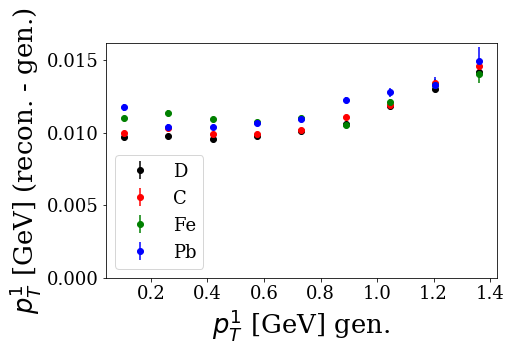

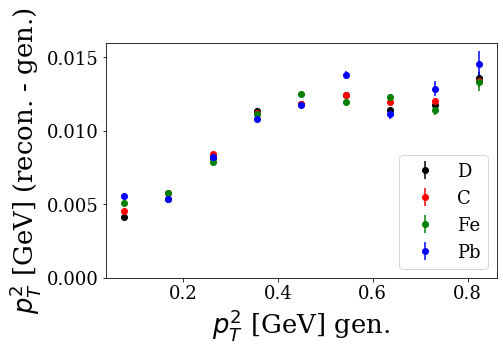

In [17]:
print(dfs_mc['D'].columns)
resolution_plot_slices('h1_cm_pt', 'h1_truth_cm_pt','h1_truth_cm_pt', xlabel='$p^1_T$ [GeV]',ylabel='$p^1_T$ [GeV]', window=0.1)
plt.savefig('images/resolution/res_pt1.png',bbox_inches='tight')
plt.show()
resolution_plot_slices('h2_cm_pt', 'h2_truth_cm_pt','h2_truth_cm_pt', xlabel='$p^2_T$ [GeV]',ylabel='$p^2_T$ [GeV]', window=0.1)
plt.savefig('images/resolution/res_pt2.png',bbox_inches='tight')
plt.show()